Adapted from https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Retina mode
%config InlineBackend.figure_format = 'retina'

In [7]:
from latexify import latexify, format_axes

In [10]:
latexify(columns=2)

In [6]:
%pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


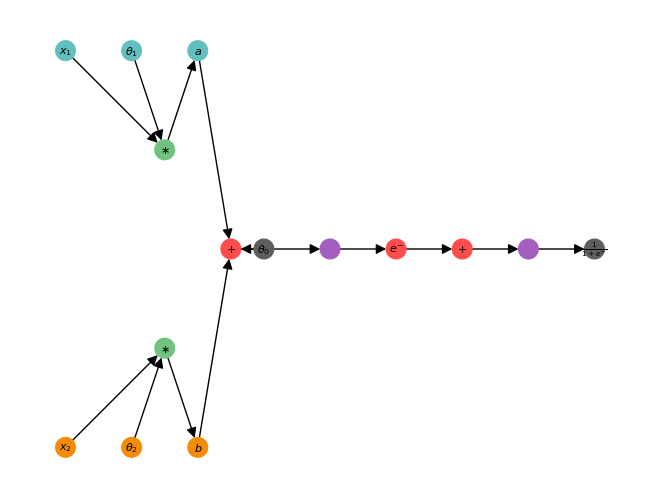

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with labels and operation types
node_labels = {
    'x1': r'$x_1$', 'theta1': r'$\theta_1$', 'a': r'$a$', 
    'x2': r'$x_2$', 'theta2': r'$\theta_2$', 'b': r'$b$', 
    'theta0': r'$\theta_0$', 
    'mul_x1_theta1': r'$\ast$', 'mul_x2_theta2': r'$\ast$', 
    'add_a_b_theta0': r'$+$', 'exp': r'$e^{-}$', 'add_one_exp': r'$+$', 'logistic': r'$\frac{1}{1+e^{-}}$'
}

# Add nodes with colors for different operations
G.add_nodes_from([
    ('x1', {'color': '#61c0bf'}), ('theta1', {'color': '#61c0bf'}), ('a', {'color': '#61c0bf'}),
    ('mul_x1_theta1', {'color': '#6fc37e'}),
    ('x2', {'color': '#f48c06'}), ('theta2', {'color': '#f48c06'}), ('b', {'color': '#f48c06'}),
    ('mul_x2_theta2', {'color': '#6fc37e'}),
    ('theta0', {'color': '#5e5e5e'}),
    ('add_a_b_theta0', {'color': '#ff4d4d'}),
    ('linear_combination', {'color': '#a35ebf'}),
    ('exp', {'color': '#ff4d4d'}),
    ('add_one_exp', {'color': '#ff4d4d'}),
    ('denominator', {'color': '#a35ebf'}),
    ('logistic', {'color': '#5e5e5e'})
])

# Add edges
G.add_edges_from([
    ('x1', 'mul_x1_theta1'), ('theta1', 'mul_x1_theta1'), ('mul_x1_theta1', 'a'),
    ('x2', 'mul_x2_theta2'), ('theta2', 'mul_x2_theta2'), ('mul_x2_theta2', 'b'),
    ('a', 'add_a_b_theta0'), ('b', 'add_a_b_theta0'), ('theta0', 'add_a_b_theta0'),
    ('add_a_b_theta0', 'linear_combination'),
    ('linear_combination', 'exp'),
    ('exp', 'add_one_exp'),
    ('add_one_exp', 'denominator'),
    ('denominator', 'logistic')
])

# Draw the graph with a horizontal layout
pos = {'x1': (0, 3), 'theta1': (1, 3), 'a': (2, 3),
       'mul_x1_theta1': (1.5, 2.5),
       'x2': (0, 1), 'theta2': (1, 1), 'b': (2, 1),
       'mul_x2_theta2': (1.5, 1.5),
       'theta0': (3, 2),
       'add_a_b_theta0': (2.5, 2),
       'linear_combination': (4, 2),
       'exp': (5, 2),
       'add_one_exp': (6, 2),
       'denominator': (7, 2),
       'logistic': (8, 2)}

nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=200, 
        font_size=8, font_color="black", font_weight="bold", arrowsize=15, node_color=[G.nodes[n]['color'] for n in G.nodes])

plt.show()


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_and_save(graph, filename):
    pos = nx.drawing.nx_pydot.graphviz_layout(graph, prog='dot')
    nx.draw(graph, pos, with_labels=True, node_size=200, node_color="skyblue",
            font_size=10, font_color="black", font_weight="bold", arrowsize=15)
    plt.savefig(filename)
    plt.close()

# Stage 1: Input Variables
G_stage1 = nx.DiGraph()
G_stage1.add_nodes_from(['x1', 'theta1', 'x2', 'theta2'])
draw_and_save(G_stage1, 's1.pdf')

# Stage 2: Intermediate Variables a and b
G_stage2 = nx.DiGraph()
G_stage2.add_nodes_from(['x1', 'theta1', 'a', 'x2', 'theta2', 'b'])
G_stage2.add_edges_from([('x1', 'a'), ('theta1', 'a'), ('x2', 'b'), ('theta2', 'b')])
draw_and_save(G_stage2, 's2.pdf')

# Stage 3: Linear Combination
G_stage3 = nx.DiGraph()
G_stage3.add_nodes_from(['x1', 'theta1', 'a', 'x2', 'theta2', 'b', 'theta0', 'linear_combination'])
G_stage3.add_edges_from([('a', 'linear_combination'), ('b', 'linear_combination'), ('theta0', 'linear_combination')])
draw_and_save(G_stage3, 's3.pdf')

# Stage 4: Exponential Term
G_stage4 = nx.DiGraph()
G_stage4.add_nodes_from(['x1', 'theta1', 'a', 'x2', 'theta2', 'b', 'theta0', 'linear_combination', 'exp'])
G_stage4.add_edges_from([('linear_combination', 'exp')])
draw_and_save(G_stage4, 's4.pdf')

# Stage 5: Denominator
G_stage5 = nx.DiGraph()
G_stage5.add_nodes_from(['x1', 'theta1', 'a', 'x2', 'theta2', 'b', 'theta0', 'linear_combination', 'exp', 'denominator'])
G_stage5.add_edges_from([('exp', 'denominator'), ('1', 'denominator')])
draw_and_save(G_stage5, 's5.pdf')

# Stage 6: Logistic Function
G_stage6 = nx.DiGraph()
G_stage6.add_nodes_from(['x1', 'theta1', 'a', 'x2', 'theta2', 'b', 'theta0', 'linear_combination', 'exp', 'denominator', 'logistic'])
G_stage6.add_edge('1', 'logistic')
draw_and_save(G_stage6, 's6.pdf')
